# 2D linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Variables
m=100
x1 = np.linspace(0, 10, m).reshape((m, 1))
x2 = np.linspace(0, 30, m).reshape((m, 1))+np.random.randn(m, 1)
y = (x1+x2 +np.random.randn(m, 1))
X = np.hstack((np.ones(x1.shape),x1,x2 ))
theta = np.random.rand(3,1)
itterations = 100
alpha = 0.001
J = np.zeros((itterations))

# Hypothesis
def h(theta):
    return X.dot(theta)

#Cost function
def computeJ(theta):
    return 1/(2*m)*np.sum(  (np.square( h(theta)-y) ) ) 

#Gradient
def gradient(theta):
    return (1/m)*X.T.dot(h(theta)-y)

#Gradient descent
def gradientDescent(alpha,itterations,theta):
    for i in range(0,itterations):
        J[i] = computeJ(theta)
        theta = theta - alpha*gradient(theta)
    return theta

# Solution

In [3]:
thetaSolution = gradientDescent(alpha,itterations,theta)
Jsol = computeJ(thetaSolution)
print('\u03B80=', thetaSolution[0], ',\u03B81=',thetaSolution[1],'\u03B82=', thetaSolution[2],'\nJ(\u03B8)=',Jsol)

θ0= [0.29486968] ,θ1= [0.14619083] θ2= [1.26388543] 
J(θ)= 0.47101937667523786


# Plot of the cost function according to number of itterations

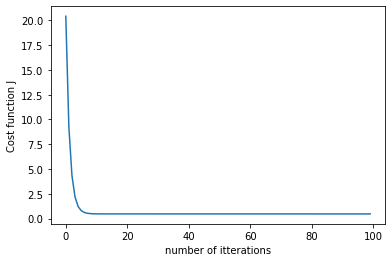

In [4]:
plt.plot(J)
plt.xlabel('number of itterations')
plt.ylabel('Cost function J')
plt.show()
plt.style.use('default')

# Plot of fitting plan and the data

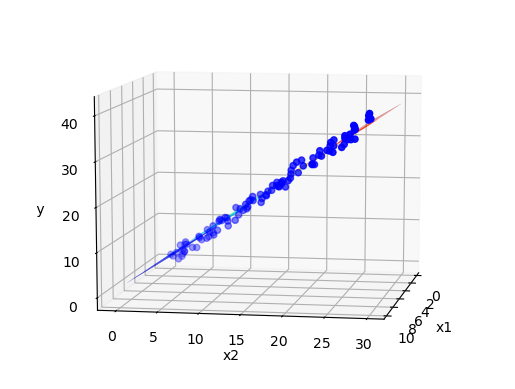

<Figure size 700x700 with 0 Axes>

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure()
ax=plt.axes(projection='3d')

ax.scatter(x1, x2, y, c='b')

ax.set_xlabel('x1')
ax.set_ylabel('x2 ')
ax.set_zlabel('x3')
n = 200

Xs, Ys = np.meshgrid(x1, x2)
Zs = np.array([np.matrix( (1,t0, t1) )*thetaSolution for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel(' y ')
ax.view_init(10, 10)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.jet,alpha=0.4)

# Performance of regression

In [16]:
y_variance = len(y)*np.var(y)
sum_squared_errors = (2*m)*computeJ(thetaSolution)
Performance = 1 - ( sum_squared_errors )/(y_variance)
print('The performance R is ',Performance) 

The performance R is  0.993259187678495
